# Comparison of data gathered from VM (4GB) and IVORY Machine for CAT Vehicle and Sparkle Simulation

In [1]:
# We will be using strym for data analysis.
# You can install strym using `pip install git+https://github.com/jmscslgroup/strym`

In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
from pylab import rcParams
import os.path
import strym

## Get the data location

In [3]:
homedir = os.path.expanduser("~")
data_folder = homedir + '/CyverseData/ProjectSparkle'
sparkle_reu_machine_1 = 'sparkle_n_1_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-23-52-28'
sparkle_reu_machine_2 = 'sparkle_n_1_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-19-07-09-11'

catvehicle_reu_machine_1 = 'catvehicle_n_1_update_rate_100.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-19-14-19-51'
catvehicle_reu_machine_2 = 'catvehicle_n_1_update_rate_100.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-23-38-24'

sparkle_ivory_machine_1 =  'sparkle_n_1_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-16-23-33'
sparkle_ivory_machine_2 =  'sparkle_n_1_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-19-08-04-53'

catvehicle_ivory_machine_1 =  'catvehicle_n_1_update_rate_100.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-17-41-44'
catvehicle_ivory_machine_2 =  'catvehicle_n_1_update_rate_100.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-17-03-34'

folders = [data_folder + '/' + catvehicle_reu_machine_1, 
           data_folder + '/' + catvehicle_reu_machine_2, 
           data_folder + '/' + catvehicle_ivory_machine_1, 
           data_folder + '/' + catvehicle_ivory_machine_2, 
           data_folder + '/' + sparkle_reu_machine_1, 
           data_folder + '/' + sparkle_reu_machine_2, 
           data_folder + '/' + sparkle_ivory_machine_1, 
           data_folder + '/' + sparkle_ivory_machine_2]

odom_file = 'magna-odom.csv'
gzstat_file = '_gzStats.txt'

data = [catvehicle_reu_machine_1,catvehicle_reu_machine_2, 
        catvehicle_ivory_machine_1,catvehicle_ivory_machine_2, 
        sparkle_reu_machine_1, sparkle_reu_machine_2,
        sparkle_ivory_machine_1, sparkle_ivory_machine_2]

gzfiles = [data_folder + '/' + f +'/'+ f+ gzstat_file   for f in data]

In [4]:
odom_df_array = []
X_array =  []
Y_array = []
gz_array = []
for i, folder in enumerate(folders):
    data = folder + '/' + odom_file
    odom_df = pd.read_csv(data)
    odom_df_array.append(odom_df)
    newdf1 = pd.DataFrame()
    newdf1['Time'] = odom_df['Time']
    newdf1['Message'] = odom_df['PoseX']
    X_array.append(newdf1)
    newdf2 = pd.DataFrame()
    newdf2['Time'] = odom_df['Time']
    newdf2['Message'] = odom_df['PoseY']
    Y_array.append(newdf2)
    

In [5]:
def bestshift(source, destination):
    '''
    Find the best shift to match destination with source signal.
    Returns a shifted version of destination signal.
    
    We will shift signals by one step starting from min= -100 to max = 100 and return correlation coefficient.
    
    We will only be using first 500 points to calculate correlation coefficient.
    '''
    corr_coeff = []
    shift  = []
    
    for sh in range(-100, 101):
        shifted_destination = destination.shift(sh)['Message']
        shifted_destination = shifted_destination.dropna()
        shifted_destination = shifted_destination.iloc[0:500]
        truncated_source = source['Message'].iloc[0:500]
        rms = sqrt(mean_squared_error(truncated_source, shifted_destination))
        #C = np.corrcoef(source['Message'].iloc[0:50], destination.shift(sh)['Message'].iloc[0:50])
        if math.isnan(rms):
            continue
        #if math.isnan(C[0][1]): 
        #    continue
        #corr_coeff.append(C[0][1])
        corr_coeff.append(rms)
        print("Minimum RMS so far is {} and required shift is {}".format(np.min(corr_coeff),np.argmin(corr_coeff) ))
        shift.append(sh)
    
    min_index = np.argmin(corr_coeff)
    required_shift = shift[min_index]
    print('Required Shift is {}'.format(required_shift))
    destination['Message'] = destination['Message'].shift(required_shift)
    return destination

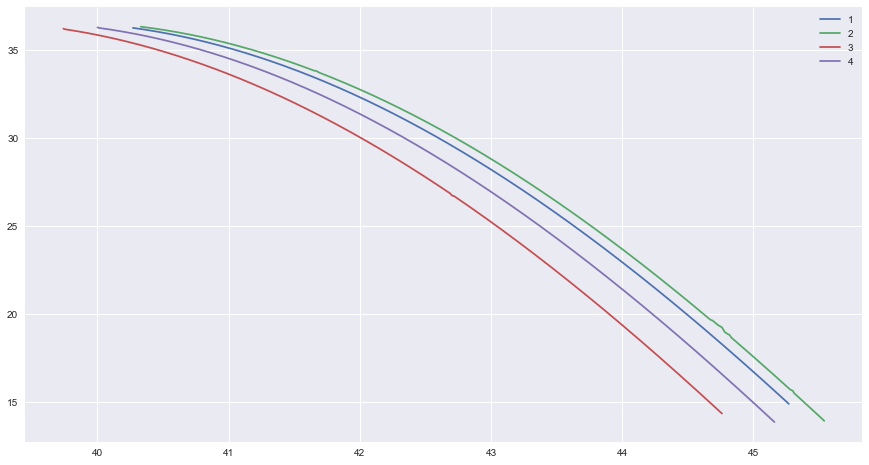

In [6]:
# We will find shift between two signals
x1 = X_array[0]['Message']
x2 = X_array[1]['Message']
rcParams['figure.figsize'] = 15, 8
plt.plot(X_array[0]['Time'].iloc[0:500],X_array[0]['Message'].iloc[0:500] )
plt.plot(X_array[1]['Time'].iloc[0:500],X_array[1]['Message'].iloc[0:500] )
plt.plot(X_array[2]['Time'].iloc[0:500],X_array[2]['Message'].iloc[0:500] )
plt.plot(X_array[3]['Time'].iloc[0:500],X_array[3]['Message'].iloc[0:500] )
plt.legend(['1','2','3','4'])

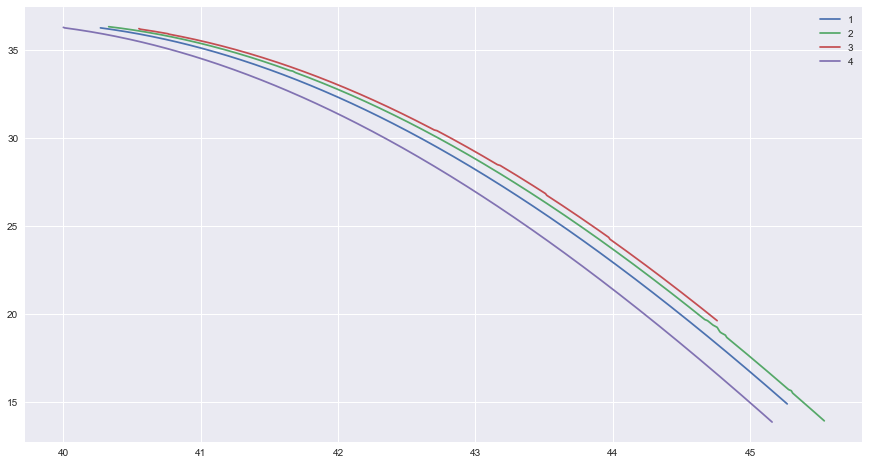

In [7]:
# We will find shift between two signals
x1 = X_array[0]['Message']
x2 = X_array[1]['Message']
plt.plot(X_array[0]['Time'].iloc[0:500],X_array[0]['Message'].iloc[0:500] )
plt.plot(X_array[1]['Time'].iloc[0:500],X_array[1]['Message'].iloc[0:500] )
plt.plot(X_array[2]['Time'].iloc[0:500],X_array[2]['Message'].shift(80).iloc[0:500] )
plt.plot(X_array[3]['Time'].iloc[0:500],X_array[3]['Message'].iloc[0:500] )
#plt.plot(X_array[4]['Time'].iloc[0:500],X_array[4]['Message'].iloc[0:500] )
#plt.plot(X_array[5]['Time'].iloc[0:500],X_array[5]['Message'].iloc[0:500] )
#plt.plot(X_array[6]['Time'].iloc[0:500],X_array[6]['Message'].iloc[0:500] )
#plt.plot(X_array[7]['Time'].iloc[0:500],X_array[7]['Message'].iloc[0:500] )
#plt.legend(['1','2','3','4','5','6','7','8'])
plt.legend(['1','2','3','4'])

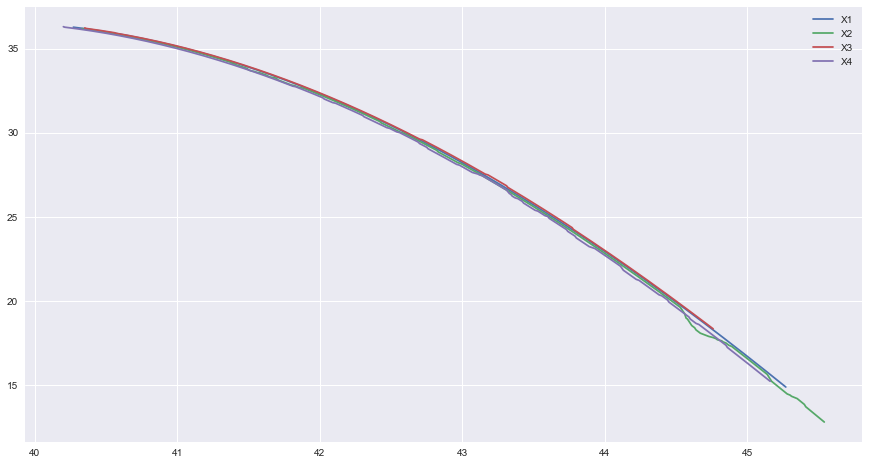

In [8]:
# I am manually aligning signals as I have not yet determined what's the best way to align signals automatically.
plt.plot(X_array[0]['Time'].iloc[0:500],X_array[0]['Message'].iloc[0:500] )
plt.plot(X_array[1]['Time'].iloc[0:500],X_array[1].shift(-15)['Message'].iloc[0:500] )
plt.plot(X_array[2]['Time'].iloc[0:500],X_array[2].shift(60)['Message'].iloc[0:500] )
plt.plot(X_array[3]['Time'].iloc[0:500],X_array[3].shift(20)['Message'].iloc[0:500] )
plt.legend(['X1','X2', 'X3','X4'])

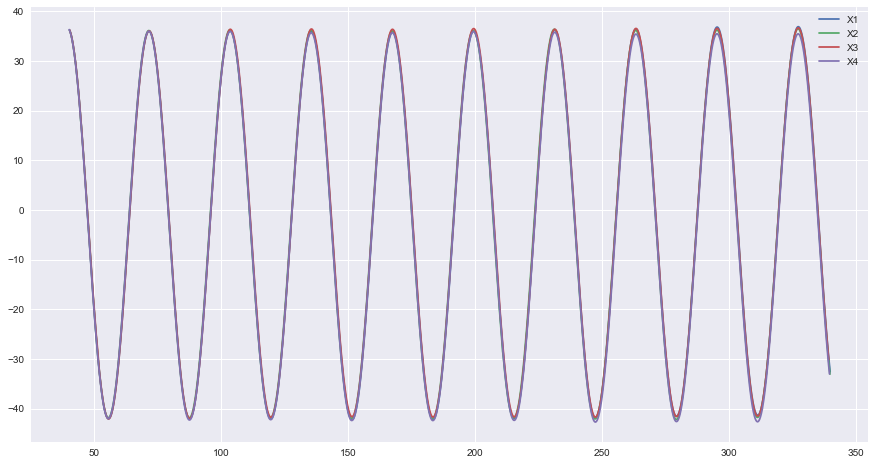

In [9]:
plt.plot(X_array[0]['Time'],X_array[0]['Message'] )
plt.plot(X_array[1]['Time'],X_array[1].shift(-15)['Message'])
plt.plot(X_array[2]['Time'],X_array[2].shift(60)['Message'] )
plt.plot(X_array[3]['Time'],X_array[3].shift(20)['Message'] )
plt.legend(['X1','X2', 'X3','X4'])

X_array[1]['Message'] = X_array[1].shift(-15)['Message']
X_array[1] = X_array[1].dropna()
X_array[2]['Message'] = X_array[1].shift(60)['Message']
X_array[2] = X_array[2].dropna()
X_array[3]['Message'] = X_array[1].shift(20)['Message']
X_array[3] = X_array[3].dropna()

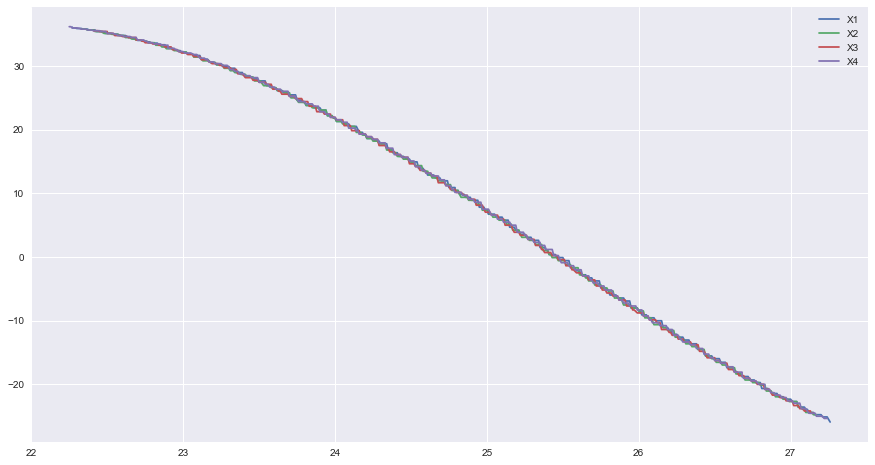

In [10]:
plt.plot(X_array[4]['Time'].iloc[0:500],X_array[4]['Message'].iloc[0:500] )
plt.plot(X_array[5]['Time'].iloc[0:500],X_array[5].shift(15)['Message'].iloc[0:500] )
plt.plot(X_array[6]['Time'].iloc[0:500],X_array[6].shift(25)['Message'].iloc[0:500] )
plt.plot(X_array[7]['Time'].iloc[0:500],X_array[7].shift(-10)['Message'].iloc[0:500] )
plt.legend(['X1','X2', 'X3','X4'])

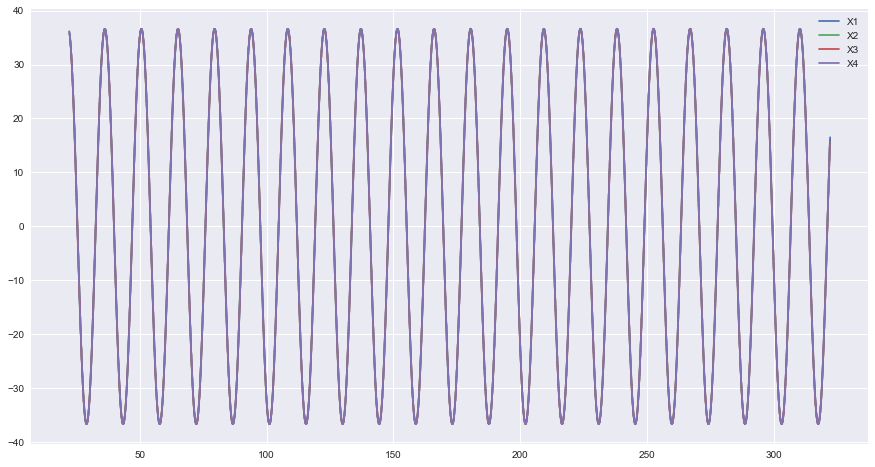

In [11]:
plt.plot(X_array[4]['Time'],X_array[4]['Message'] )
plt.plot(X_array[5]['Time'],X_array[5].shift(15)['Message'] )
plt.plot(X_array[6]['Time'],X_array[6].shift(25)['Message'] )
plt.plot(X_array[7]['Time'],X_array[7].shift(-10)['Message'])
plt.legend(['X1','X2', 'X3','X4'])

X_array[5]['Message'] = X_array[5].shift(15)['Message'] 
X_array[5] = X_array[5].dropna()
X_array[6]['Message'] = X_array[6].shift(25)['Message'] 
X_array[6] = X_array[6].dropna()
X_array[7]['Message'] = X_array[7].shift(-10)['Message']
X_array[7] = X_array[7].dropna()

## We will resample the two timeseries  to calculate root mean square error.
### Older approach

Room Mean Square Error between Two Simulations performed on REU Computer was 0.6978197880777198


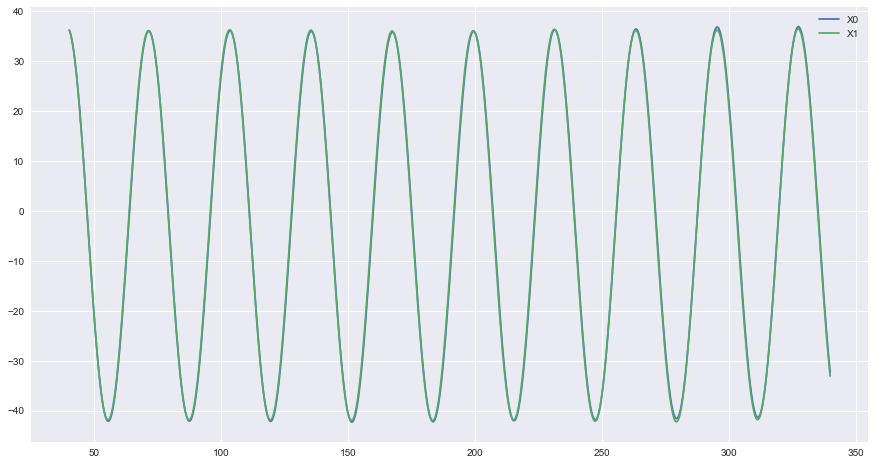

In [12]:
X0_new, X1_new = strym.ts_sync(X_array[0], X_array[1])
plt.plot(X0_new['Time'], X0_new['Message'])
plt.plot(X1_new['Time'], X1_new['Message'])
plt.legend(['X0', 'X1'])
rms = sqrt(mean_squared_error(X0_new['Message'],X1_new['Message']))
print('Room Mean Square Error between Two Simulations performed on REU Computer was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on IVORY Computer was 2.38449903128022


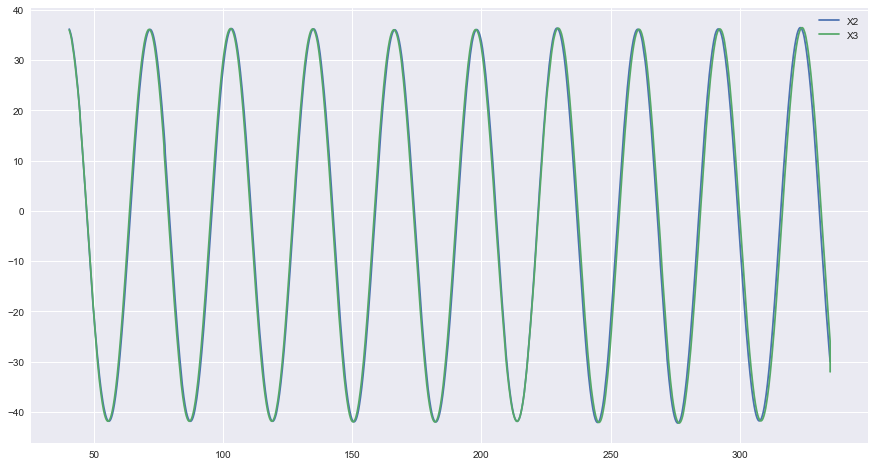

In [13]:
X2_new, X3_new = strym.ts_sync(X_array[2], X_array[3])
plt.plot(X2_new['Time'], X2_new['Message'])
plt.plot(X3_new['Time'], X3_new['Message'])
plt.legend(['X2', 'X3'])
rms = sqrt(mean_squared_error(X2_new['Message'],X3_new['Message']))
print('Room Mean Square Error between Two Simulations performed on IVORY Computer was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 10.64410053678389


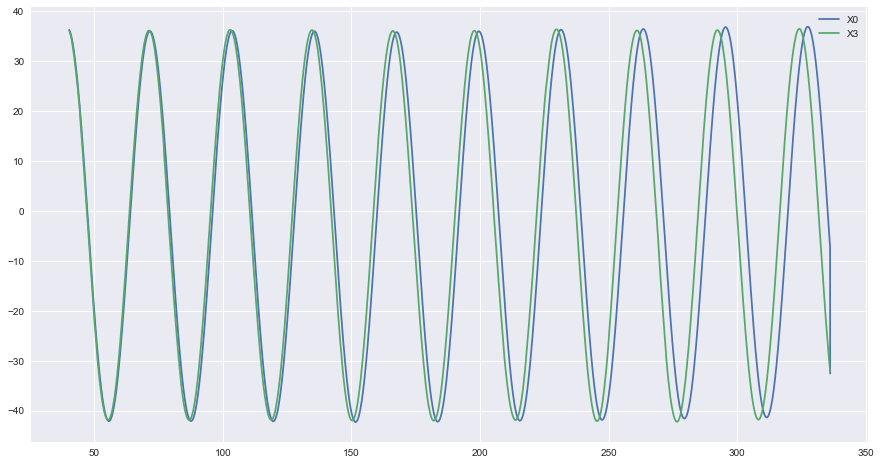

In [21]:
X0_new, X3_new = strym.ts_sync(X_array[0], X_array[3])
plt.plot(X0_new['Time'], X0_new['Message'])
plt.plot(X3_new['Time'], X3_new['Message'])
plt.legend(['X0', 'X3'])
rms = sqrt(mean_squared_error(X0_new['Message'],X3_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 11.788645885177557


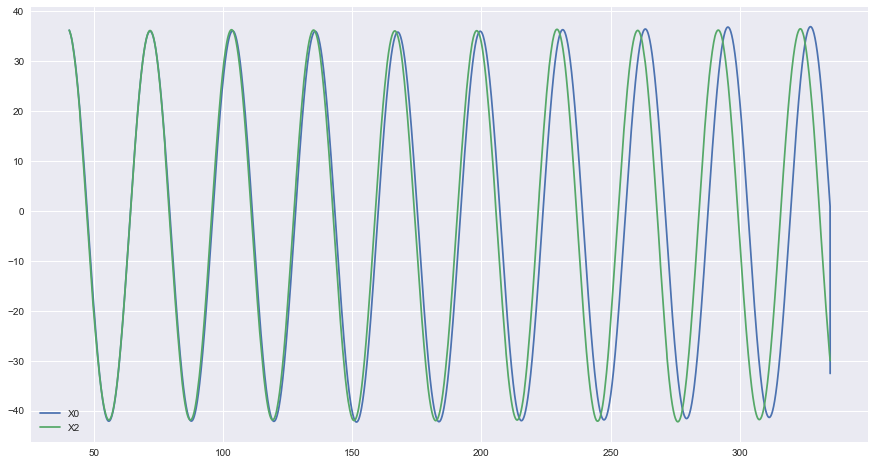

In [22]:
X0_new, X2_new = strym.ts_sync(X_array[0], X_array[2])
plt.plot(X0_new['Time'], X0_new['Message'])
plt.plot(X2_new['Time'], X2_new['Message'])
plt.legend(['X0', 'X2'])
rms = sqrt(mean_squared_error(X0_new['Message'],X2_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 11.38623189423091


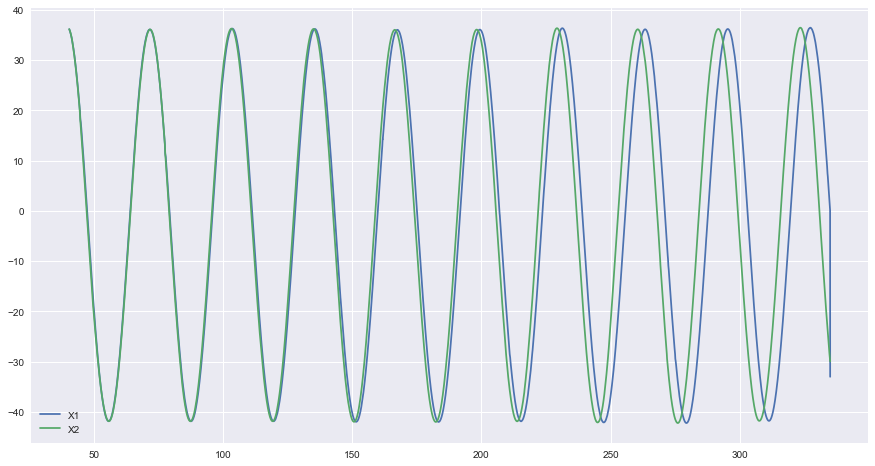

In [24]:
X1_new, X2_new = strym.ts_sync(X_array[1], X_array[2])
plt.plot(X1_new['Time'], X1_new['Message'])
plt.plot(X2_new['Time'], X2_new['Message'])
plt.legend(['X1', 'X2'])
rms = sqrt(mean_squared_error(X1_new['Message'],X2_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 10.169818369371056


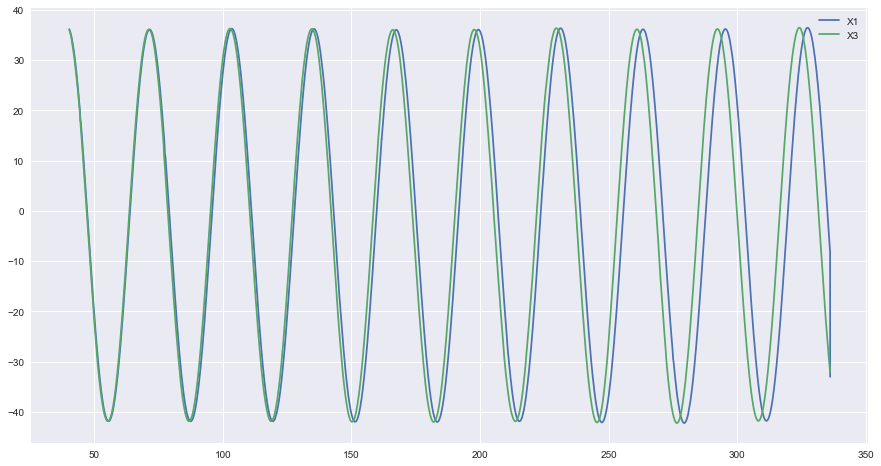

In [23]:
X1_new, X3_new = strym.ts_sync(X_array[1], X_array[3])
plt.plot(X1_new['Time'], X1_new['Message'])
plt.plot(X3_new['Time'], X3_new['Message'])
plt.legend(['X1', 'X3'])
rms = sqrt(mean_squared_error(X1_new['Message'],X3_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

### Newer approach

Room Mean Square Error between Two Simulations performed on REU Computer was 0.28156816530973927


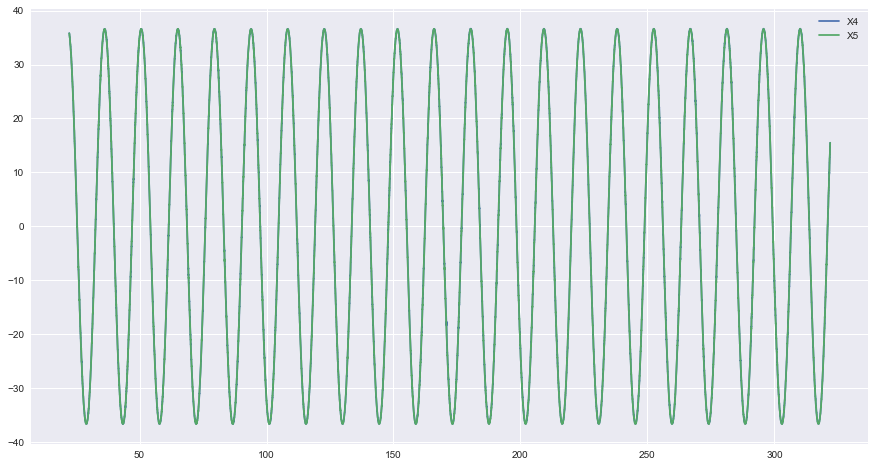

In [15]:
X4_new, X5_new = strym.ts_sync(X_array[4], X_array[5])
plt.plot(X4_new['Time'], X4_new['Message'])
plt.plot(X5_new['Time'], X5_new['Message'])
plt.legend(['X4', 'X5'])
rms = sqrt(mean_squared_error(X4_new['Message'],X5_new['Message']))
print('Room Mean Square Error between Two Simulations performed on REU Computer was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on IVORY computer was 0.2724948716357641


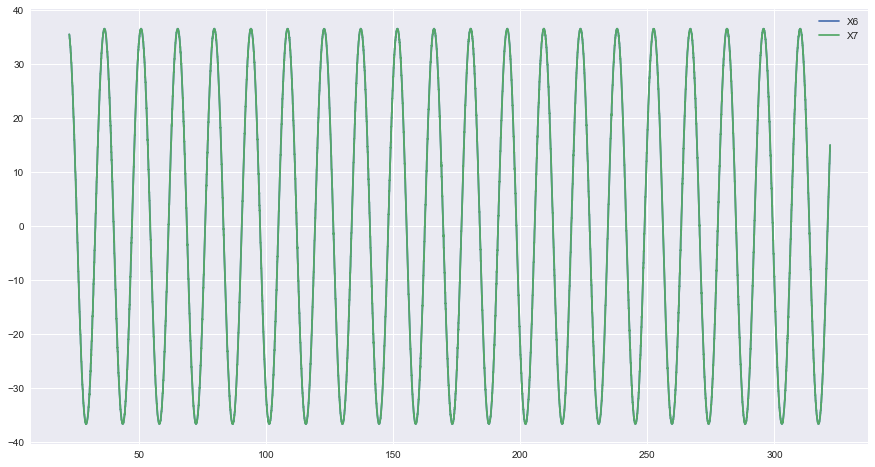

In [18]:
X6_new, X7_new = strym.ts_sync(X_array[6], X_array[7])
plt.plot(X6_new['Time'], X7_new['Message'])
plt.plot(X6_new['Time'], X7_new['Message'])
plt.legend(['X6', 'X7'])
rms = sqrt(mean_squared_error(X6_new['Message'],X7_new['Message']))
print('Room Mean Square Error between Two Simulations performed on IVORY computer was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 0.2525838443859071


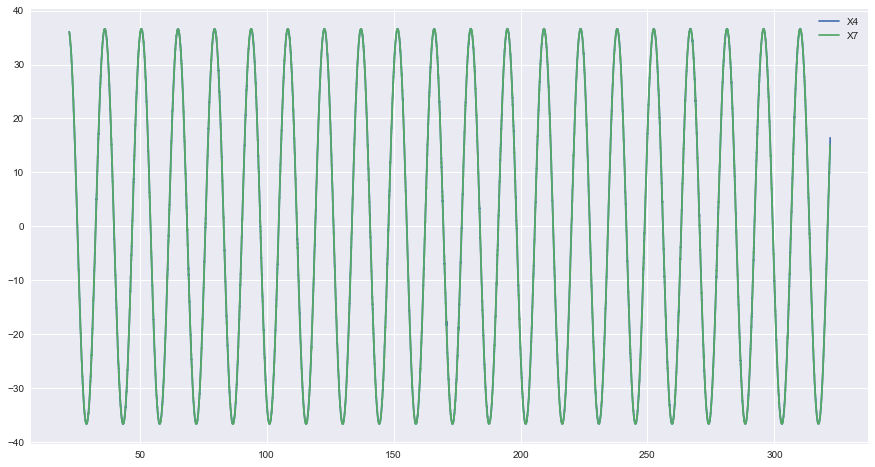

In [17]:
X4_new, X7_new = strym.ts_sync(X_array[4], X_array[7])
plt.plot(X4_new['Time'], X4_new['Message'])
plt.plot(X7_new['Time'], X7_new['Message'])
plt.legend(['X4', 'X7'])
rms = sqrt(mean_squared_error(X4_new['Message'],X7_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 0.27433666044149285


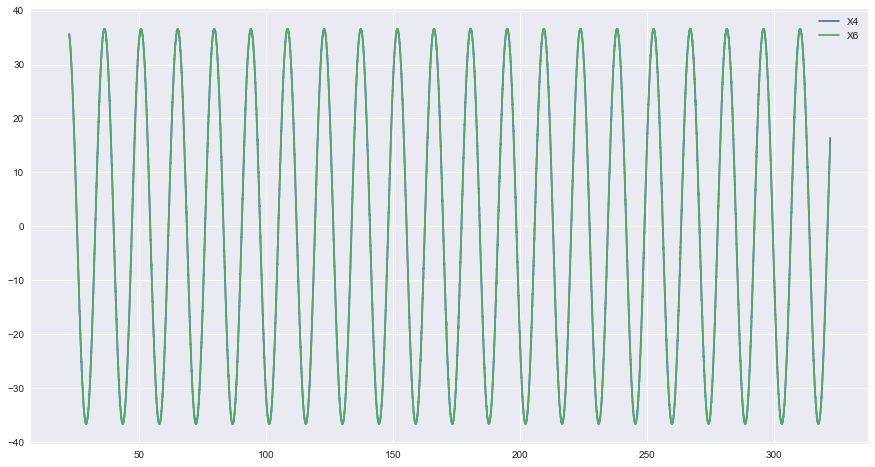

In [25]:
X4_new, X6_new = strym.ts_sync(X_array[4], X_array[6])
plt.plot(X4_new['Time'], X4_new['Message'])
plt.plot(X6_new['Time'], X6_new['Message'])
plt.legend(['X4', 'X6'])
rms = sqrt(mean_squared_error(X4_new['Message'],X6_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 0.26934350786541805


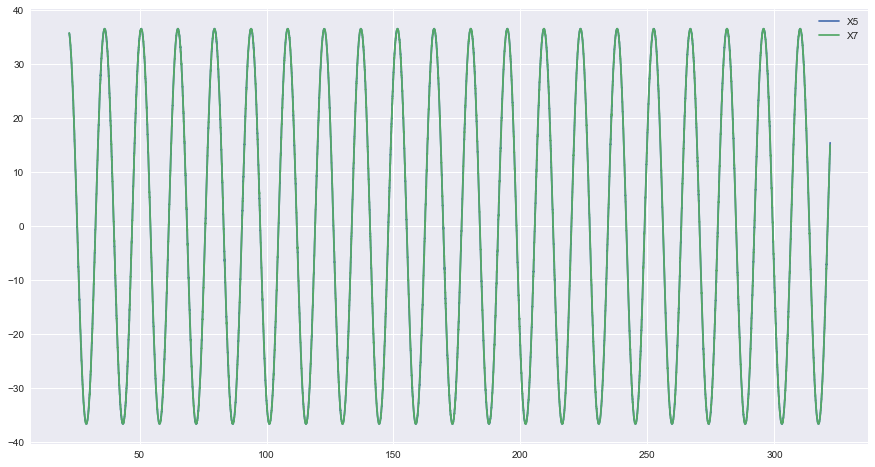

In [26]:
X5_new, X7_new = strym.ts_sync(X_array[5], X_array[7])
plt.plot(X5_new['Time'], X5_new['Message'])
plt.plot(X7_new['Time'], X7_new['Message'])
plt.legend(['X5', 'X7'])
rms = sqrt(mean_squared_error(X5_new['Message'],X7_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 0.260560015549208


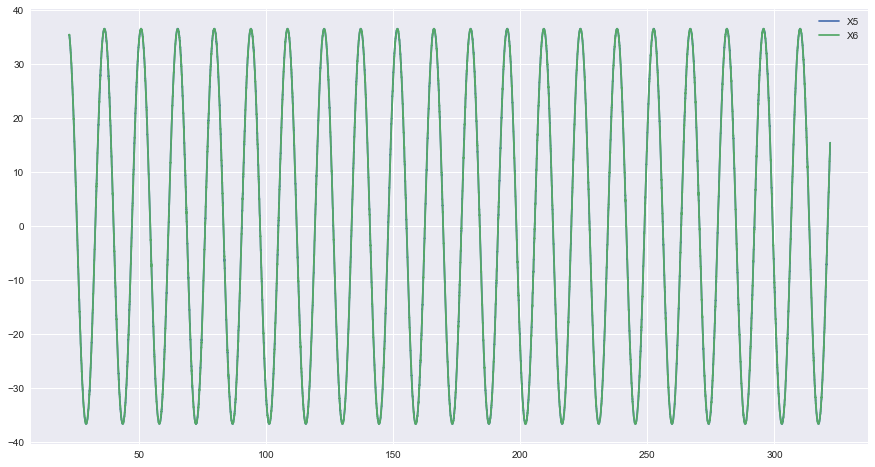

In [27]:
X5_new, X6_new = strym.ts_sync(X_array[5], X_array[6])
plt.plot(X5_new['Time'], X5_new['Message'])
plt.plot(X6_new['Time'], X6_new['Message'])
plt.legend(['X5', 'X6'])
rms = sqrt(mean_squared_error(X5_new['Message'],X6_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))